In [1]:
import matplotlib.pyplot as plt
from mlx_vlm import generate, load
from mlx_vlm.prompt_utils import apply_chat_template
from mlx_vlm.utils import load_config
from PIL import Image, ImageOps

Load the model

In [2]:
model_path = "mlx-community/Qwen2.5-VL-3B-Instruct-8bit"
model, processor = load(model_path)
config = load_config(model_path)

Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

Show input image

Original size after EXIF correction: 1145x1722
Image size after resizing: (292, 438)


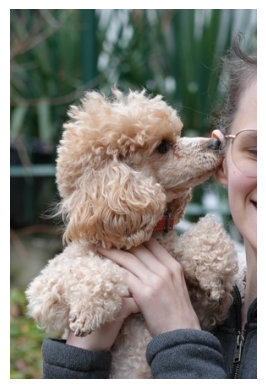

In [3]:
image_path = "/Users/ljoana/LLMs-Journey/DSC00047.JPG"
image = Image.open(image_path)
image = ImageOps.exif_transpose(image)

width, height = image.size
print(f"Original size after EXIF correction: {width}x{height}")
new_width, new_height = (438, 292) if width > height else (292, 438)
image = image.resize((new_width, new_height))
print(f"Image size after resizing: {image.size}")

plt.imshow(image)
plt.axis("off")
plt.show()

Prepare image input and prompt

In [4]:
image = [image]
prompt = "Describe the images."

In [5]:
# Apply chat template
formatted_prompt = apply_chat_template(
    processor, config, prompt, num_images=len(image)
)

Generate output

In [6]:
output = generate(model, processor, formatted_prompt, image, verbose=True)

Image: [<PIL.Image.Image image mode=RGB size=292x438 at 0x494C532B0>] 

Prompt: <|im_start|>system
You are a helpful assistant.<|im_end|>
<|im_start|>user
Describe the images.<|vision_start|><|image_pad|><|vision_end|><|im_end|>
<|im_start|>assistant

The image shows a close-up of a person holding a small, fluffy, light brown poodle. The poodle has a curly, well-groomed coat and is being held in the person's hands. The person is wearing glasses and has short, dark hair. The background appears to be outdoors, with some greenery visible, suggesting a garden or park setting. The overall mood of the image is warm and affectionate, capturing a tender moment between the person and the poodle.
Prompt: 185 tokens, 265.317 tokens-per-sec
Generation: 99 tokens, 36.795 tokens-per-sec
Peak memory: 4.241 GB


In [7]:
print(output)

The image shows a close-up of a person holding a small, fluffy, light brown poodle. The poodle has a curly, well-groomed coat and is being held in the person's hands. The person is wearing glasses and has short, dark hair. The background appears to be outdoors, with some greenery visible, suggesting a garden or park setting. The overall mood of the image is warm and affectionate, capturing a tender moment between the person and the poodle.
